*Proyecto final*

*Curso: Introducción a la ciencia de datos (IMT-2200)*

*Profesora: Paula Aguirre*

*Integrantes: Karla Muñoz, Cristobal Strange, Antonia Painen, Ignacio Garrido*

*Pontifice Universidad Catolica de Chile*

**<font size="5">Correlación entre rendimiento académico de Estudiantes VS ingreso medio a nivel Comunal de la región metropolitana para el año 2021 </font>**

### **Motivación de la investigación**

Chile ha sido catalogado como uno de los países con una marcada desigualdad entre los miembros de sus habitantes. Esto ha generado brechas de acceso en distintas materias que dependen de factores económicos como la salud, las pensiones, o la educación. 
El presente proyecto de investigación tiene como motivación analizar y verificar si existe una correlacion entre el rendimiento academico de los estudiantes y el nivel de ingreso que tienen dichos estudiantes durante el año 2021 para la región Metropolitana de Chile.

**Preguntas de Investigacion, objetivos y Metodologia.**
El objetivo general es encontrar una correlación entre variables escogidas a nivel de promedio por comunas (Rendimiento academico) en la región metropolitana realizando una regresión lineal y un análisis georeferenciado con métricas estadísticas. Para ello se eligen las siguientes variables:

1) Rendimiento académico de los estudiantes en la prueba de selección universitaria del año 2021.

2) Variables económicas asociada al decil promedio de ingresos de cada comuna para el año 2021.

3) Preferencias de instituciones de educacion superior de los estudiantes para el año 2021.

**Metodología**.
La metodología empleada fue la siguiente:
Para cada dataframe se filtraron los datos primero utilizando como criterio la región metropolitana. Posterior a esto, se realizo un 'groupby' tomando como variable las comunas de la región metropolitana y calculando así el promedio del rendimiento e ingresos en alumnos de 17 y 18 años. Luego, cada miembro del grupo analizo su dataframe por separado para obtener información sobre si existen indicios de que se cumplan las preguntas de investigación.
Finalmente, se juntan los dataframes y se realiza una regresion lineal, donde se busca predecir si el rendimiento académico esta correlacionado con el nivel de ingreso de las personas a nivel comunal.

**Preguntas de Investigacion**
Preguntas de investigación: La investigación pretende resolver las siguientes preguntas de investigación.

¿Influye el factor económico en el acceso a la educación superior?

¿Influye el rendimiento académico en el acceso a la educación superior?

¿Cuál de las anteriores variables puede tener un mayor impacto?

¿Es posible encontrar una correlación entre el rendimiento académico promedio por comuna y el nivel de ingreso medio por comuna?

¿Se puede predecir el desempeño del próximo año a partir de lo observado?

**Datos**: En general, se utilizan datos públicos pertenecientes a bases de datos del ministerio de educación del estado de Chile y del consejo nacional de educación:

1) **Rendimiento académico por estudiante (Ministerio de educación)**: Corresponde a un dataframe de los resultados académicos obtenidos en el año 2021 de todos los alumnos de todos los colegios de Chile. Este dataframe fue filtrado, escogiendo como criterios de filtro las comunas de la región metropolitana, y un rango de edad de los alumnos entre 17 y 18 años para así obtener el rendimiento académico promedio de notas por comuna.

Extraído de https://datosabiertos.mineduc.cl/rendimiento-por-estudiante-2/

2) **Pruebas de admisión a la educación superior (Ministerio de educación)**: Corresponde a un dataframe que contiene información sobre la prueba de admisión 2022 (realizada en diciembre del 2021). De este dataframe se extraen los datos referidos a variables sociales y del puntaje obtenido por los estudiantes en promedio por comuna de la región metropolitana.

Extraido de https://datosabiertos.mineduc.cl/pruebas-de-admision-a-la-educacion-superior/

3) **Índices BD Matrículas (Consejos nacional de educación)**: Corresponde a una base de datos que contiene información sobre matrículas, aranceles, vacantes de carreras universitarias de Chile entre el año 2005 y 2022. Para efectos de este trabajo se utilizan los datos del año 2021 (admisión 2022).

Extraido de https://www.cned.cl/bases-de-datos

4) **Cartografía de la región metropolitana**: Corresponde a un geodataframe con la cartografia de la región metropolitana en formato gpkg.

Extraido de https://www.ide.cl/

In [33]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
def limpiar(string):
    r = ""
    for i in string:
        if i == "á":
            r += "a"
        elif i== "é":
            r += "e"
        elif i== "í":
            r += "i"
        elif i== "ó":
            r += "o"
        elif i== "ú":
            r += "u"
        else:
            r+=i
    return r

### **Dataframe de tipo de institucion educativa preferente por alumnos saliendo de Cuarto Medio**

#### El siguiente dataframe contiene información referente a las matrículas de los alumnos (El tipo de institución de educación superior en la cuál se matricularon para un determinado año y para una determinada región).
#### Para efectos de este trabajo se utilizan solo los datos del año 2021 y de la RM.

**Filtrado de datos**

In [3]:
df_carreras = pd.read_excel('Dataframes/basedefinitivaindices_2005-2022.xlsx')
df_carreras.columns

Index(['Año', 'Cód. Institución', 'Nombre Institución', 'Tipo Institución',
       'Clasificación1', 'Clasificación2', 'Clasificación3', 'Clasificación4',
       'Clasificación5', 'Clasificación6', 'Nombre de la Sede',
       'Comuna donde se imparte la carrera o programa', 'Nombre Region',
       'Orden Geográfico de la Región (Norte aSur)', 'Cód. Carrera',
       'Carrera Genérica', 'Nombre Programa', 'Mención o Especialidad',
       'Horario', 'Tipo Programa', 'Area Conocimiento', 'idgenerocarrera',
       'Tipo Carrera', 'IngresoDirecto', 'Año Inicio Actividades',
       'Nombre del Campus', 'Duración (en semestres)', 'Cód. Campus',
       'Cód. Sede', 'Título', 'Grado Académico',
       'Máximo Puntaje (promedio matemáticas y lenguaje)',
       'Promedio Puntaje (promedio matemáticas y lenguaje)',
       'Mínimo Puntaje (promedio matemáticas y lenguaje)',
       'Puntaje de corte (primer seleccionado)',
       'Puntaje de corte (promedio de la carrera)',
       'Puntaje de corte (

In [17]:
df_col_filtradas = df_carreras[['Año','Nombre Institución','Nombre Region','Tipo Institución','Promedio Puntaje (promedio matemáticas y lenguaje)','Promedio Puntaje NEM','Promedio Puntaje Ranking']]
df_col_filtradas = df_col_filtradas[df_col_filtradas['Nombre Region']=='Región Metropolitana'].reset_index(drop=True)
df_col_filtradas.head()

,Año,Nombre Institución,Nombre Region,Tipo Institución,Promedio Puntaje (promedio matemáticas y lenguaje),Promedio Puntaje NEM,Promedio Puntaje Ranking
0,2022,U. DE CHILE,Región Metropolitana,Univ.,599.0,696.0,733.0
1,2022,U. DE CHILE,Región Metropolitana,Univ.,630.0,739.0,785.0
2,2022,U. DE CHILE,Región Metropolitana,Univ.,682.0,749.0,773.0
3,2022,U. DE CHILE,Región Metropolitana,Univ.,637.0,726.0,766.0
4,2022,U. DE CHILE,Región Metropolitana,Univ.,597.0,697.0,732.0


In [18]:
# Promedio [Puntaje psu, nem, ranking] respecto al tipo de institución
promedio_institucion = df_col_filtradas.groupby(by='Tipo Institución',as_index=False).mean()
promedio_institucion.drop('Año', inplace=True, axis=1)
promedio_institucion

,Tipo Institución,Promedio Puntaje (promedio matemáticas y lenguaje),Promedio Puntaje NEM,Promedio Puntaje Ranking
0,C.F.T.,464.544000,505.000000,478.000000
1,F.F.A.A.,579.578947,587.965517,601.045455
2,I.P.,458.729290,506.473684,493.727273
3,Univ.,565.539431,583.689485,613.634250


In [19]:
# Media [Puntaje psu, nem, ranking] respecto al tipo de institución
media_institucion = df_col_filtradas.groupby(by='Tipo Institución',as_index=False).median()
media_institucion.drop('Año', inplace=True, axis=1)
media_institucion

,Tipo Institución,Promedio Puntaje (promedio matemáticas y lenguaje),Promedio Puntaje NEM,Promedio Puntaje Ranking
0,C.F.T.,450.0,505.0,478.0
1,F.F.A.A.,583.5,577.0,592.5
2,I.P.,451.0,519.0,500.0
3,Univ.,559.0,566.0,591.0


**Análisis Exploratorio de Datos**

<AxesSubplot:xlabel='Tipo Institución', ylabel='Promedio Puntaje (promedio matemáticas y lenguaje)'>

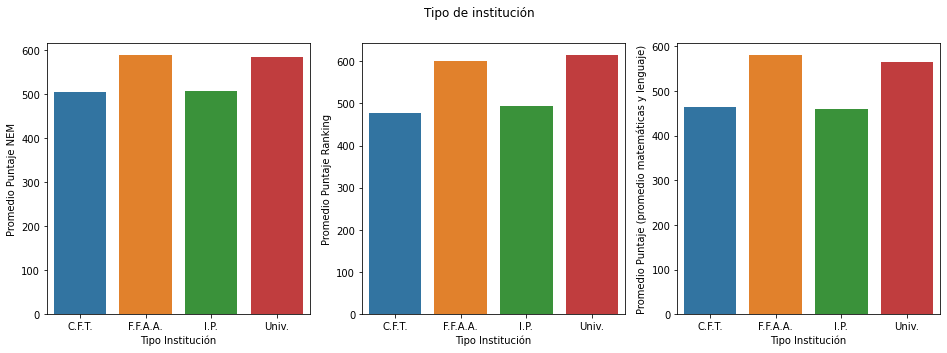

In [8]:
f, ax = plt.subplots(1,3,figsize=(16,5))
f.suptitle("Tipo de institución")
sns.barplot(data=promedio_institucion, x='Tipo Institución', y='Promedio Puntaje NEM', ax=ax[0])
sns.barplot(data=promedio_institucion, x='Tipo Institución', y='Promedio Puntaje Ranking',ax=ax[1])
sns.barplot(data=promedio_institucion, x='Tipo Institución', y='Promedio Puntaje (promedio matemáticas y lenguaje)',ax=ax[2])

#### Del presente Dataframe es posible concluir que los alumnos con mejor rendimiento académico de la región metropolitana tienden a elegir como instituciones preferentes pra matricularse la Universidad y luego las Fuerzas Armadas.
#### Si bien es común que el ingreso a la universidad tenga una alta frecuencia, la alta frecuencia de las F.F.A.A se puede explicar debido a que el servicio militar en Chile sigue siendo obligatorio, o bien porque ingresan a la escuela militar, institución que si exige un puntaje PSU relativamente alto.

### **Dataframe de Ingresos y rendimiento PSU/Ranking/NEM por comuna**

#### El siguiente dataframe contiene información relativa los alumnos de Chile del año 2021 (Tales como rendimiento académico, situación socioeconómica por decil, situación social, entre otros)

**Filtrado de datos**

In [35]:
#En caso de dar un error, recordar descomprimir Datos.rar
df_soc = pd.read_csv("Dataframes/Socioeconomico_2022.csv", delimiter=";")
df_soc = df_soc[["NOMBRE_COMUNA_DOMICILIO","INGRESO_PERCAPITA_GRUPO_FA","CUANTOS_TRABAJAN_GRUPO_FAM","CODIGO_REGION_DOMICILIO"]]

df_soc = df_soc[df_soc["CODIGO_REGION_DOMICILIO"] == 13].drop(columns="CODIGO_REGION_DOMICILIO")

df_soc.rename(columns={"NOMBRE_COMUNA_DOMICILIO": "COMUNA", "INGRESO_PERCAPITA_GRUPO_FA":"INGRESOS", "CUANTOS_TRABAJAN_GRUPO_FAM": "N_TRABAJAN"}, inplace=True)
df_soc["INGRESOS"] = df_soc["INGRESOS"].replace("99", np.nan)
df_soc["INGRESOS"] = df_soc["INGRESOS"].replace(" ", np.nan)
df_soc.INGRESOS = df_soc.INGRESOS.astype("float32")


df_soc["N_TRABAJAN"] = df_soc["N_TRABAJAN"].replace(16, 0)
df_soc["N_TRABAJAN"] = df_soc["N_TRABAJAN"].replace(99, np.nan)


df_soc_stats = df_soc.groupby(by="COMUNA").median()
df_soc_stats["N_TRABAJAN"] = df_soc[["COMUNA","N_TRABAJAN"]].groupby(by="COMUNA").mean()
df_soc_stats.head()

C:\Users\USPC5\AppData\Local\Temp\ipykernel_18372\3308562537.py:2: DtypeWarning: Columns (34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_soc = pd.read_csv("Dataframes/Socioeconomico_2022.csv", delimiter=";")


,INGRESOS,N_TRABAJAN
COMUNA,,
ALHUE,3.0,0.908046
BUIN,4.0,1.115009
CALERA DE TANGO,5.0,1.214106
CERRILLOS,3.0,1.064081
CERRO NAVIA,3.0,1.107692


In [36]:
df = pd.read_csv("Dataframes/Puntajes_2022.csv", delimiter=";")
df[df.CLEC_ACTUAL == " "]
df.columns

Index(['MRUN', 'ANYO_PROCESO', 'COD_SEXO', 'FECHA_NACIMIENTO', 'RBD',
       'CODIGO_ENS', 'LOCAL_EDUCACIONAL', 'UNIDAD_EDUCATIVA',
       'NOMBRE_UNIDAD_EDUC', 'RAMA_EDUCACIONAL', 'DEPENDENCIA',
       'CODIGO_REGION_EGRESO', 'NOMBRE_REGION_EGRESO',
       'CODIGO_PROVINCIA_EGRESO', 'NOMBRE_PROVINCIA_EGRESO',
       'CODIGO_COMUNA_EGRESO', 'NOMBRE_COMUNA_EGRESO', 'ANYO_DE_EGRESO',
       'PROMEDIO_NOTAS', 'PTJE_NEM', 'PORC_SUP_NOTAS', 'PTJE_RANKING',
       'CLEC_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL',
       'PROM_CM_ACTUAL', 'PERCENTIL_CM_ACTUAL', 'BEA', 'CLEC_ANTERIOR',
       'MATE_ANTERIOR', 'HCSO_ANTERIOR', 'CIEN_ANTERIOR', 'PROM_CM_ANTERIOR',
       'PERCENTIL_CM_ANTERIOR', 'PUNTAJES_PROCESO', 'PRUEBA_CL', 'FORMA_CL',
       'CORRECTAS_CL', 'ERRADAS_CL', 'OMITIDAS_CL', 'PRUEBA_MATE',
       'FORMA_MATE', 'CORRECTAS_MATE', 'ERRADAS_MATE', 'OMITIDAS_MATE',
       'PRUEBA_HCS', 'FORMA_HCS', 'CORRECTAS_HCS', 'ERRADAS_HCS',
       'OMITIDAS_HCS', 'PRUEBA_CBIO', 'FORMA_

In [37]:
df_puntajes = df[["PROMEDIO_NOTAS", "PTJE_RANKING", "CLEC_ACTUAL", "MATE_ACTUAL", "HCSO_ACTUAL", "CIEN_ACTUAL", "NOMBRE_COMUNA_EGRESO", "ANYO_DE_EGRESO", "CODIGO_REGION_EGRESO"]]
df_puntajes = df_puntajes[df_puntajes["CODIGO_REGION_EGRESO"] == 13]
df_puntajes = df_puntajes[df_puntajes["ANYO_DE_EGRESO"] == 2021].reset_index().drop(columns=["CODIGO_REGION_EGRESO", "ANYO_DE_EGRESO", "index"])
df_puntajes.info()
df_puntajes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73526 entries, 0 to 73525
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PROMEDIO_NOTAS        73526 non-null  object
 1   PTJE_RANKING          73526 non-null  int64 
 2   CLEC_ACTUAL           73526 non-null  object
 3   MATE_ACTUAL           73526 non-null  object
 4   HCSO_ACTUAL           73526 non-null  object
 5   CIEN_ACTUAL           73526 non-null  object
 6   NOMBRE_COMUNA_EGRESO  73526 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.9+ MB


,PROMEDIO_NOTAS,PTJE_RANKING,CLEC_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,NOMBRE_COMUNA_EGRESO
0,"6,35",772,303,369,373,0,CONCHALI
1,"5,5",583,384,396,479,0,COLINA
2,"6,45",850,0,0,0,0,HUECHURABA
3,"5,37",528,359,369,491,0,MACUL
4,"5,35",519,423,325,508,0,COLINA


In [38]:
l = ["CLEC_ACTUAL", "MATE_ACTUAL", "HCSO_ACTUAL","CIEN_ACTUAL"]
for col in l:
    df_puntajes[col] = df_puntajes[col].replace(" ", np.nan)

    df_puntajes[col] = df_puntajes[col].replace("0", np.nan)


df_puntajes["PROMEDIO_NOTAS"] = df_puntajes["PROMEDIO_NOTAS"].replace(" ", np.nan)
df_puntajes['PROMEDIO_NOTAS'] = df_puntajes['PROMEDIO_NOTAS'].str.replace(',', '.')
df_puntajes = df_puntajes.astype({"CLEC_ACTUAL": "float32","MATE_ACTUAL": "float32","HCSO_ACTUAL": "float32","CIEN_ACTUAL": "float32", "NOMBRE_COMUNA_EGRESO": "category", "PROMEDIO_NOTAS": "float32"})
df_puntajes_grande = df_puntajes
df_puntajes.head()

,PROMEDIO_NOTAS,PTJE_RANKING,CLEC_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,NOMBRE_COMUNA_EGRESO
0,6.35,772,303.0,369.0,373.0,NaN,CONCHALI
1,5.50,583,384.0,396.0,479.0,NaN,COLINA
2,6.45,850,NaN,NaN,NaN,NaN,HUECHURABA
3,5.37,528,359.0,369.0,491.0,NaN,MACUL
4,5.35,519,423.0,325.0,508.0,NaN,COLINA


In [39]:
df_promedio = df_puntajes.groupby(by="NOMBRE_COMUNA_EGRESO").mean()
df_promedio.reset_index(inplace=True)
df_promedio = df_promedio.rename(columns={"NOMBRE_COMUNA_EGRESO":"COMUNA", "PTJE_RANKING" : "RANKING", "PROMEDIO_NOTAS": "NEM", "CLEC_ACTUAL": "LENGUAJE", "MATE_ACTUAL": "MATEMATICAS", "HCSO_ACTUAL" :"HISTORIA", "CIEN_ACTUAL": "CIENCIAS"})
df_promedio.to_csv("Dataframes/promedio_puntajes_pdt.csv", sep=",", index=False)
df_promedio.head()

,COMUNA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS
0,ALHUE,5.768235,633.235294,398.822235,438.522736,414.592590,419.576935
1,BUIN,5.834584,596.377888,478.751984,489.613312,481.094910,478.683990
2,CALERA DE TANGO,6.062634,657.846975,520.878052,533.761108,523.261169,537.232239
3,CERRILLOS,5.695290,571.275214,488.194214,486.797913,479.683624,483.455780
4,CERRO NAVIA,5.707121,580.460606,434.112915,462.518677,446.877411,422.113464


In [40]:
len(df_promedio)

52

In [41]:
df_todo = df_promedio.merge(df_soc_stats, on="COMUNA")
df_todo.head()

,COMUNA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS,INGRESOS,N_TRABAJAN
0,ALHUE,5.768235,633.235294,398.822235,438.522736,414.592590,419.576935,3.0,0.908046
1,BUIN,5.834584,596.377888,478.751984,489.613312,481.094910,478.683990,4.0,1.115009
2,CALERA DE TANGO,6.062634,657.846975,520.878052,533.761108,523.261169,537.232239,5.0,1.214106
3,CERRILLOS,5.695290,571.275214,488.194214,486.797913,479.683624,483.455780,3.0,1.064081
4,CERRO NAVIA,5.707121,580.460606,434.112915,462.518677,446.877411,422.113464,3.0,1.107692


**Análisis exploratorio de datos**

(350.0, 750.0)

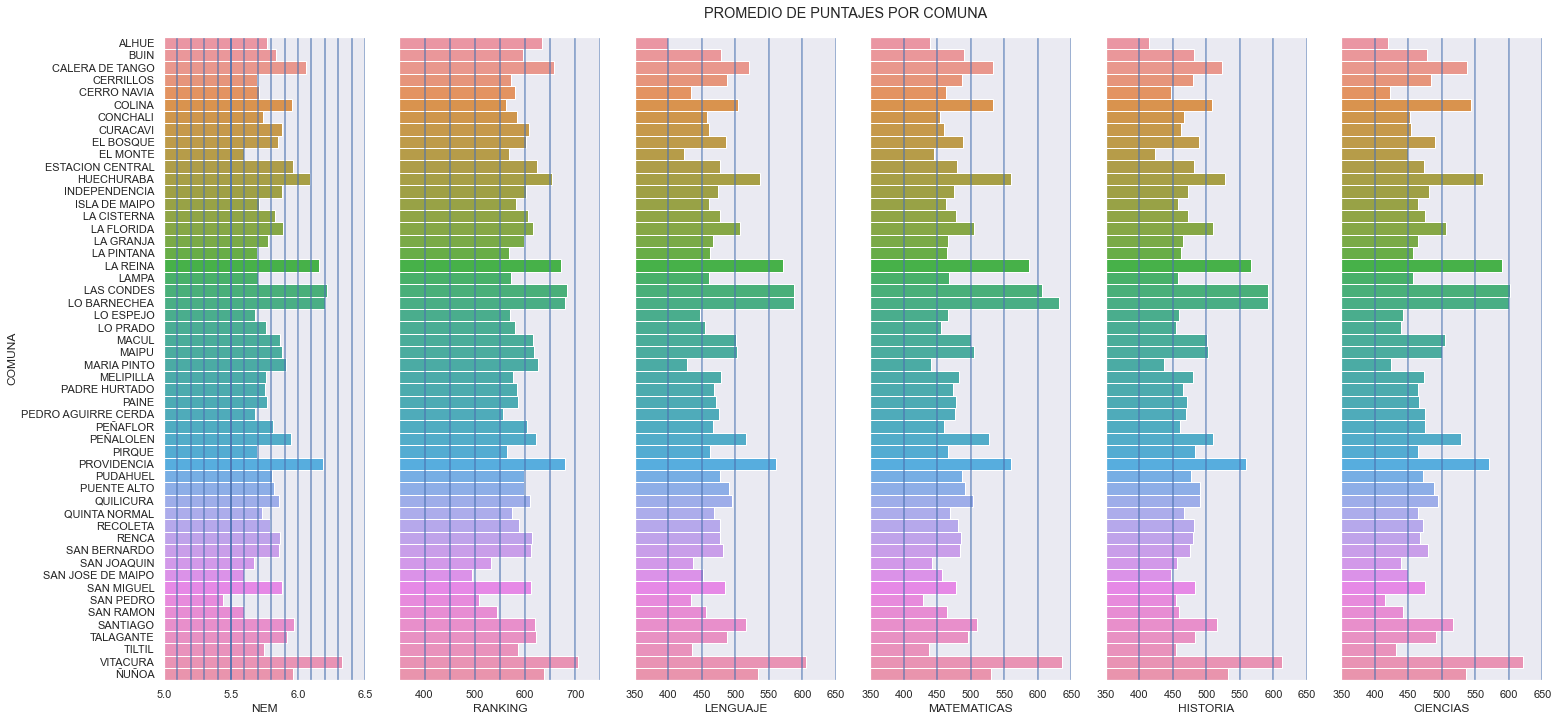

In [22]:
f, ax = plt.subplots(1,6, figsize=(20,10), sharey=True)
sns.set(font_scale=1)
cols = df_promedio.columns[1:]
f.suptitle("PROMEDIO DE PUNTAJES POR COMUNA")
f.tight_layout()
ax[0].set_xlim(5,6.5)
ax[0].set_xticks(np.arange(5,6.6,0.5))
ax[0].axvline(5.5)
for j in np.arange(5,7.1,0.1):
    ax[0].axvline(j, alpha=.75)
for i in range(0,6):
    if i != 0:
        ax[i].yaxis.set_visible(False)
        ax[i].set_xlim(350,650)
        for j in range(0,801,50):
            ax[i].axvline(j, alpha=.75)
    sns.barplot(df_promedio, y="COMUNA", x=cols[i], ax=ax[i],width=1)
ax[1].set_xlim(350,750)

#### En el presente gráfico, es posible apreciar que las comunas con mayores niveles de ingresos de la región metropolitana lideran el rendimiento académico en comparación con el resto. 

In [42]:
comunas = gpd.read_file("Dataframes/COMUNA/COMUNAS_2020.shp").to_crs(4326)
comunas_rm = comunas[comunas["REGION"] == "Metropolitana de Santiago"].reset_index()
comunas_rm = comunas_rm[["COMUNA", "geometry"]]
comunas_rm.COMUNA = comunas_rm.COMUNA.map(lambda x:limpiar(x).upper())
comunas_rm.head()

,COMUNA,geometry
0,LO BARNECHEA,"POLYGON ((-70.33273 -33.10034, -70.33211 -33.1..."
1,PIRQUE,"POLYGON ((-70.44598 -33.57922, -70.44519 -33.5..."
2,SAN JOSE DE MAIPO,"POLYGON ((-69.86109 -34.11837, -69.86197 -34.1..."
3,PAINE,"POLYGON ((-70.61396 -33.73862, -70.61272 -33.7..."
4,MELIPILLA,"POLYGON ((-70.94808 -33.55995, -70.94808 -33.5..."


In [43]:
prom_rm = df_todo.merge(comunas_rm, on="COMUNA")
prom_rm = gpd.GeoDataFrame(prom_rm)
prom_rm.head()

,COMUNA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS,INGRESOS,N_TRABAJAN,geometry
0,ALHUE,5.768235,633.235294,398.822235,438.522736,414.592590,419.576935,3.0,0.908046,"POLYGON ((-71.00925 -33.89198, -71.00817 -33.8..."
1,BUIN,5.834584,596.377888,478.751984,489.613312,481.094910,478.683990,4.0,1.115009,"POLYGON ((-70.61396 -33.73862, -70.61505 -33.7..."
2,CALERA DE TANGO,6.062634,657.846975,520.878052,533.761108,523.261169,537.232239,5.0,1.214106,"POLYGON ((-70.77075 -33.57105, -70.76915 -33.5..."
3,CERRILLOS,5.695290,571.275214,488.194214,486.797913,479.683624,483.455780,3.0,1.064081,"POLYGON ((-70.71241 -33.48121, -70.71227 -33.4..."
4,CERRO NAVIA,5.707121,580.460606,434.112915,462.518677,446.877411,422.113464,3.0,1.107692,"POLYGON ((-70.71922 -33.41332, -70.71891 -33.4..."


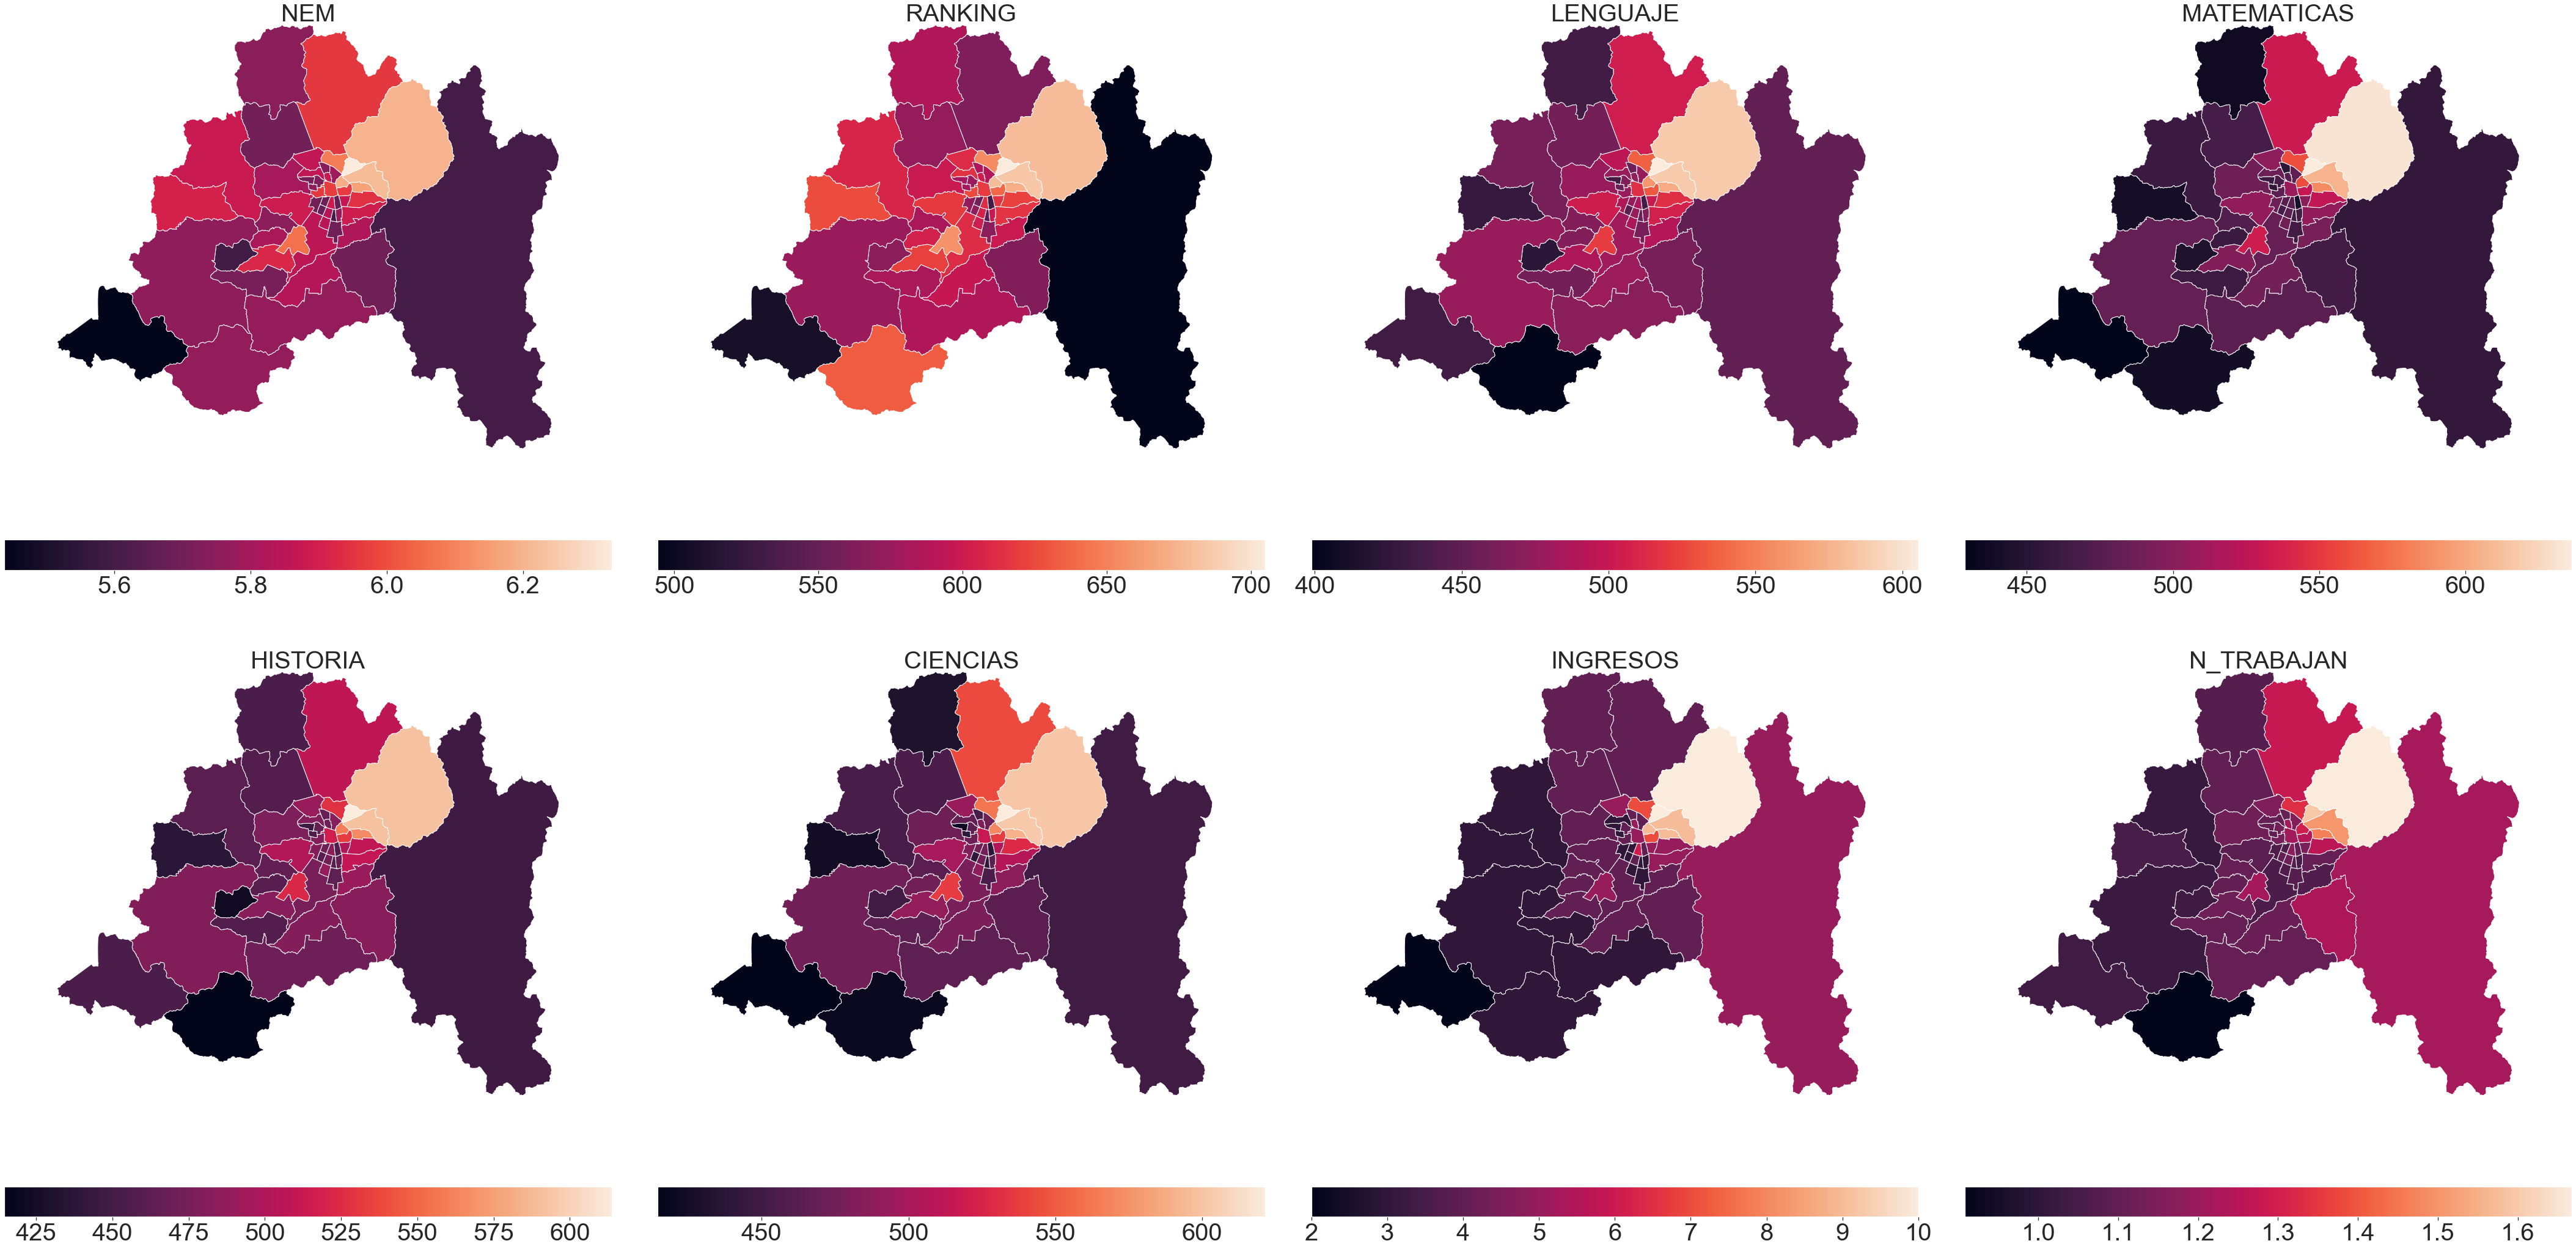

In [14]:
f, ax = plt.subplots(2,4, figsize=(60,30))
cols = prom_rm.columns[1:9]
SMALL_SIZE = 40
MEDIUM_SIZE = 50

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

f.tight_layout()
for i in range(0,2):
    for j in range(0,4):
        ax[i][j].margins(0.0001, 0.0001)
        ax[i][j].set_axis_off()
        ax[i][j].set_title(cols[i*4+j])
        prom_rm.plot(column=cols[i*4+j],legend=True, ax=ax[i][j], legend_kwds={'orientation': "horizontal"})

#### Se nota una correlación entre las comunas con más INGRESOS y mejores resultados académicos, notándose más la diferencia en los resultados PDT.
#### Además, cabe destacar que hay una ligera correlación entre cuantas personas trabajan en promedio en un hogar y los ingresos que este mismo hogar tiene, lo que claro, tiene sentido, pero también nos revela que hay sectores en los que es mucho más común que trabaje sola una persona en cada hogar.

**Nota importante: INGRESOS es la mediana por comuna, representando el decil al que pertenece el hogar según sus ingresos, mientras que N_TRABAJAN es el promedio de gente que trabaja en el hogar**.

### **Dataframe de asistencia y promedio por comuna**

**Filtrado de datos**

In [44]:
df_rendimiento = pd.read_csv('Dataframes/20220302_Rendimiento_2021_20220131_WEB.csv', sep = ';',  decimal=",")
df_rendimiento

C:\Users\USPC5\AppData\Local\Temp\ipykernel_18372\3200872040.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rendimiento = pd.read_csv('Dataframes/20220302_Rendimiento_2021_20220131_WEB.csv', sep = ';',  decimal=",")


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
0,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.5,98,P,P,0
1,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.5,98,P,P,0
2,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,5.8,90,P,P,0
3,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,0.0,0,Y,Y,0
4,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,1101,IQUIQUE,400,410,41001,4.1,70,R,R,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237038,2021,41955,9,ESCUELA HOSPITALARIA LOS ÁNGELES,8,BBIO,83,8301,LOS ÁNGELES,82,...,8110,TALCAHUANO,0,0,0,0.0,0,Y,Y,0
3237039,2021,41955,9,ESCUELA HOSPITALARIA LOS ÁNGELES,8,BBIO,83,8301,LOS ÁNGELES,82,...,13125,QUILICURA,0,0,0,6.5,100,P,P,0
3237040,2021,41955,9,ESCUELA HOSPITALARIA LOS ÁNGELES,8,BBIO,83,8301,LOS ÁNGELES,82,...,8306,NACIMIENTO,0,0,0,5.0,100,P,P,0
3237041,2021,41955,9,ESCUELA HOSPITALARIA LOS ÁNGELES,8,BBIO,83,8301,LOS ÁNGELES,82,...,8301,LOS ÁNGELES,0,0,0,6.6,100,P,P,0


In [45]:
#Este codigo genera el dataframe filtrado del rendimiento
df_rendimiento = df_rendimiento[df_rendimiento['EDAD_ALU'] != ' ']
df_rendimiento_rm = df_rendimiento[df_rendimiento.COD_REG_RBD == 13]
df_rendimiento_rm = df_rendimiento_rm.loc[(df_rendimiento.EDAD_ALU == 18) | (df_rendimiento.EDAD_ALU == 17)]
df_rendimiento_rm_promedio = df_rendimiento_rm.groupby('NOM_COM_RBD').mean().reset_index()
df_rendimiento_rm_promedio = df_rendimiento_rm_promedio[['COD_COM_RBD','COD_DEPE2' ,'PROM_GRAL', 'ASISTENCIA']]
comunas = df_rendimiento[['COD_COM_RBD', 'NOM_COM_RBD']]
df_final_filtrado = pd.merge(df_rendimiento_rm_promedio, comunas, on = 'COD_COM_RBD')
df_final_filtrado = df_final_filtrado.drop_duplicates().reset_index()
df_final_filtrado = df_final_filtrado[['COD_COM_RBD','COD_DEPE2','PROM_GRAL','ASISTENCIA','NOM_COM_RBD']]
df_final_filtrado

,COD_COM_RBD,COD_DEPE2,PROM_GRAL,ASISTENCIA,NOM_COM_RBD
0,13502.0,1.000000,5.484932,81.178082,ALHUÉ
1,13402.0,1.504608,5.182028,76.610599,BUIN
2,13403.0,1.888889,5.629167,83.392361,CALERA DE TANGO
3,13102.0,2.000000,4.841667,85.937500,CERRILLOS
4,13103.0,5.000000,3.677381,57.619048,CERRO NAVIA
5,13301.0,1.915847,5.543060,88.567213,COLINA
6,13104.0,2.000000,5.470881,47.107280,CONCHALÍ
7,13503.0,1.380645,5.453763,83.374194,CURACAVÍ
8,13105.0,2.000000,5.223524,76.088109,EL BOSQUE
9,13602.0,1.000000,4.494615,72.246154,EL MONTE


In [46]:
df_final_filtrado.to_csv('Dataframes/rendimiento_promedio_filtrado_2021.csv',index = False)

**Análisis exploratorio de datos**

In [47]:
df_filtrado_ploteable = df_final_filtrado[['NOM_COM_RBD', 'ASISTENCIA', 'PROM_GRAL']]
df_filtrado_ploteable=df_filtrado_ploteable.rename(columns = {'NOM_COM_RBD':'COMUNA'})
df_filtrado_ploteable

,COMUNA,ASISTENCIA,PROM_GRAL
0,ALHUÉ,81.178082,5.484932
1,BUIN,76.610599,5.182028
2,CALERA DE TANGO,83.392361,5.629167
3,CERRILLOS,85.937500,4.841667
4,CERRO NAVIA,57.619048,3.677381
5,COLINA,88.567213,5.543060
6,CONCHALÍ,47.107280,5.470881
7,CURACAVÍ,83.374194,5.453763
8,EL BOSQUE,76.088109,5.223524
9,EL MONTE,72.246154,4.494615


#### Notamos que si bien las comunas con más ingresos son aquellas que están en el intervalo más alto de calificaciones en promedio, no necesariamente eso significa que sea debido a la cantidad de ingresos ya que existen otras comunas de menores ingresos que también poseen resultados altos. 
#### Ahora bien, en Chile es una realidad de que muchos colegios de comunas de bajos ingresos inflan el promedio de notas de sus alumnos por distintos fines, por lo que utilizar otro criterio como el rendimiento PSU puede ser mas acertado ya que termina siendo un mismo mecanismo evaluativo aplicado para todas las personas, independiente del colegio del que salieron.

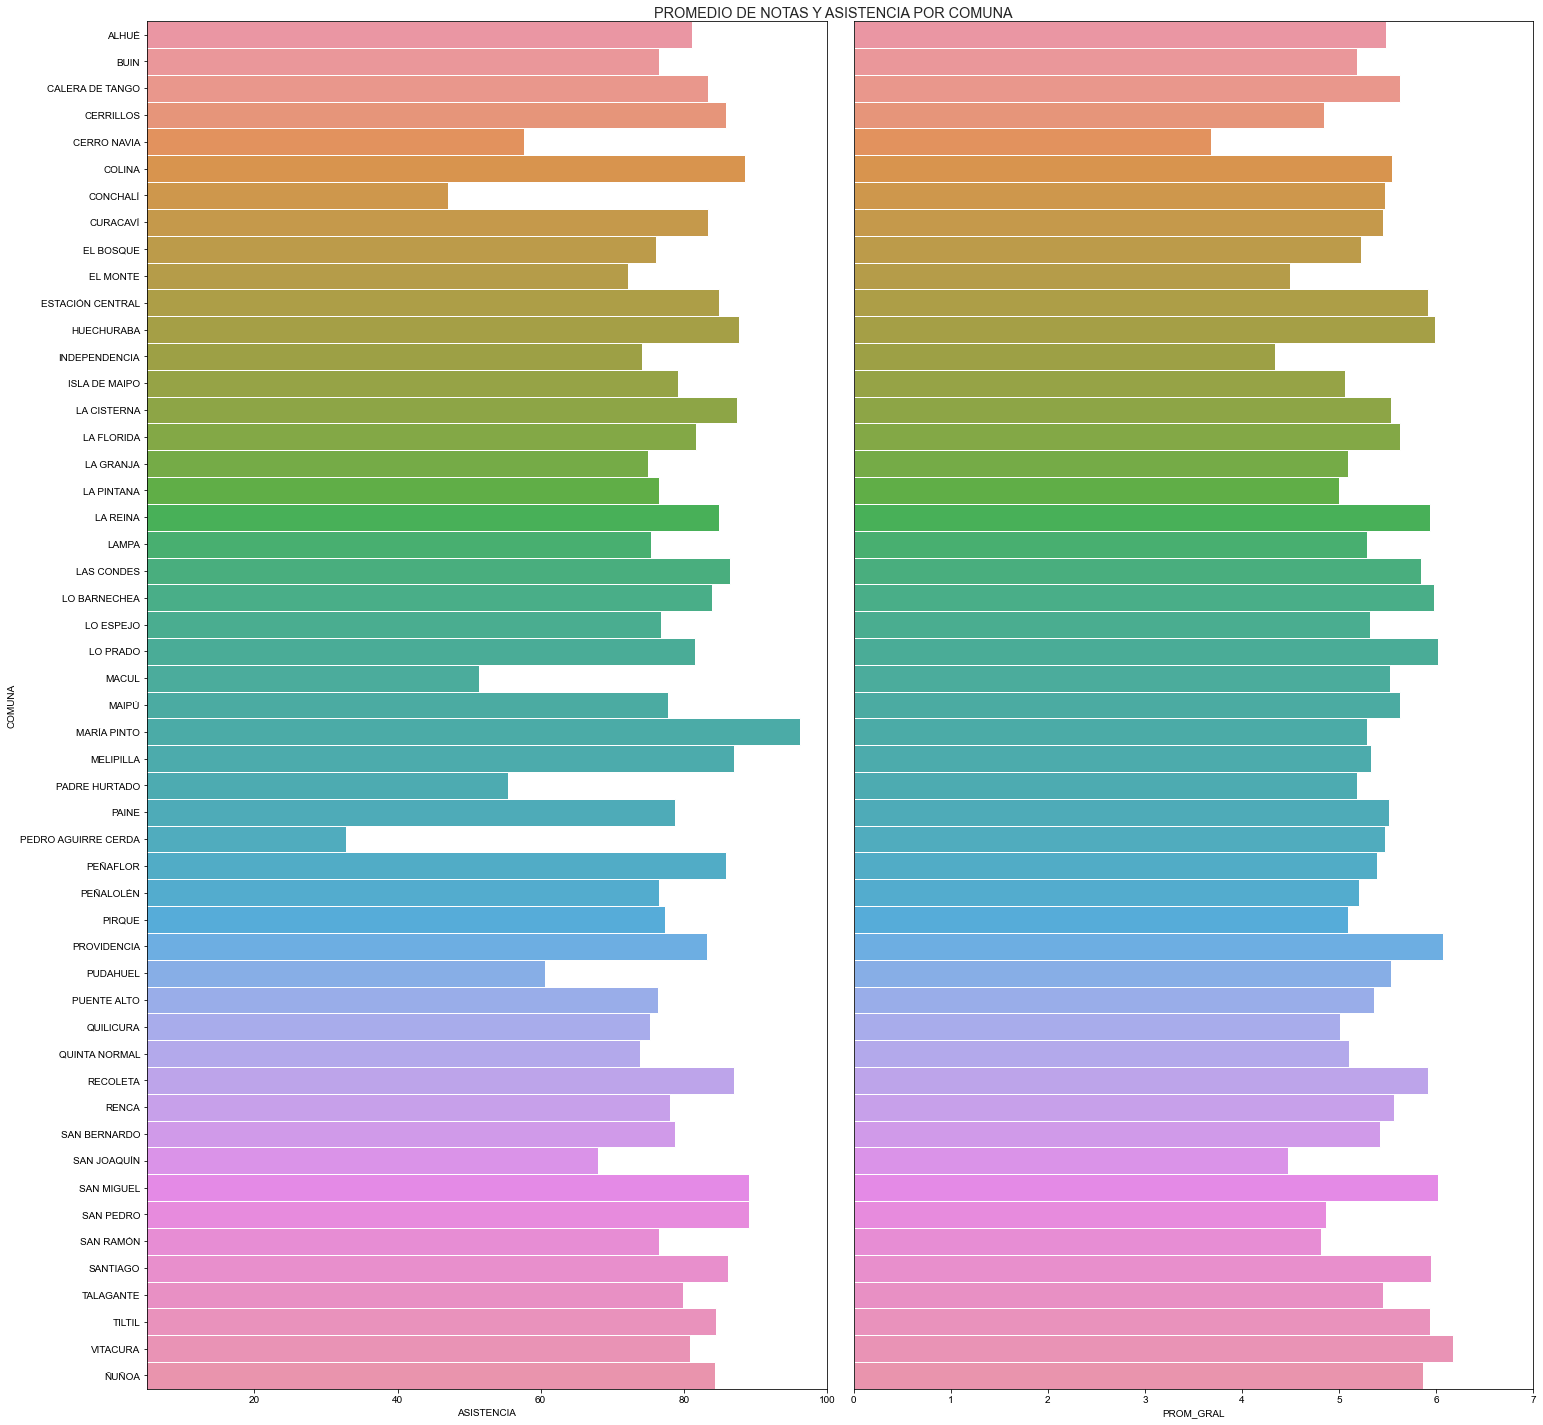

In [26]:
f, ax = plt.subplots(1,2, figsize=(20,20), sharey=True)
sns.set(font_scale=1)
cols = df_filtrado_ploteable.columns[1:]
f.suptitle("PROMEDIO DE NOTAS Y ASISTENCIA POR COMUNA")
f.tight_layout()
ax[0].set_xlim(5,100.0)
for i in range(0,2):
    if i != 0:
        if i == 1:
            ax[i].yaxis.set_visible(False)
            ax[i].set_xlim(0,7)
        else:
            ax[i].yaxis.set_visible(False)
            ax[i].set_xlim(0,200)

            
        
    sns.barplot(df_filtrado_ploteable, y="COMUNA", x=cols[i], ax=ax[i],width=1)

### **Dataframe de la regresion lineal**

In [52]:
df_rendimiento = pd.read_csv('Dataframes/rendimiento_promedio_filtrado_2021.csv')
# df_psu = pd.read_csv("Dataframes/promedio_puntajes_pdt.csv")
df_psu = pd.read_csv("Dataframes/promedio_puntaje_ingreso.csv")
gdf_comunas = gpd.read_file("Dataframes/COMUNA/COMUNAS_2020.shp").to_crs(4326)[["geometry", "COMUNA", "REGION"]]
gdf_comunas = gdf_comunas[gdf_comunas["REGION"] == "Metropolitana de Santiago"]
gdf_comunas.COMUNA = gdf_comunas.COMUNA.map(lambda x:limpiar(x).upper())

df_rendimiento.drop(columns=["COD_COM_RBD", "COD_DEPE2"], inplace=True)
df_rendimiento.rename(columns={"NOM_COM_RBD": "COMUNA"}, inplace=True)
df_rendimiento.COMUNA = df_rendimiento.COMUNA.map(lambda x:limpiar(x).upper())
df_rendimiento.head()

,PROM_GRAL,ASISTENCIA,COMUNA
0,5.484932,81.178082,ALHUÉ
1,5.182028,76.610599,BUIN
2,5.629167,83.392361,CALERA DE TANGO
3,4.841667,85.937500,CERRILLOS
4,3.677381,57.619048,CERRO NAVIA


In [53]:
df_psu.head()

,COMUNA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS,INGRESOS,N_TRABAJAN
0,ALHUE,5.768235,633.235294,398.82224,438.52274,414.5926,419.57693,7.0,1.0
1,ALHUE,5.768235,633.235294,398.82224,438.52274,414.5926,419.57693,NaN,1.0
2,ALHUE,5.768235,633.235294,398.82224,438.52274,414.5926,419.57693,9.0,2.0
3,ALHUE,5.768235,633.235294,398.82224,438.52274,414.5926,419.57693,1.0,0.0
4,ALHUE,5.768235,633.235294,398.82224,438.52274,414.5926,419.57693,NaN,NaN


In [54]:
df_psu = df_psu.groupby('COMUNA').mean().reset_index()
df_psu = df_psu.drop('N_TRABAJAN', axis = 1)
df_psu.head()

,COMUNA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS,INGRESOS
0,ALHUE,5.768235,633.235294,398.82224,438.52274,414.59260,419.57693,4.180556
1,BUIN,5.834584,596.377888,478.75198,489.61330,481.09490,478.68400,4.357830
2,CALERA DE TANGO,6.062633,657.846975,520.87805,533.76110,523.26117,537.23224,5.153125
3,CERRILLOS,5.695290,571.275214,488.19420,486.79790,479.68362,483.45578,4.329077
4,CERRO NAVIA,5.707121,580.460606,434.11290,462.51868,446.87740,422.11346,4.046481


In [55]:
gdf_todo = df_rendimiento.merge(df_psu, on="COMUNA")
gdf_todo = gdf_todo[["COMUNA", "ASISTENCIA", "NEM", "RANKING", "LENGUAJE", "MATEMATICAS", "HISTORIA", "CIENCIAS", "INGRESOS"]]
gdf_todo.head()

,COMUNA,ASISTENCIA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS,INGRESOS
0,BUIN,76.610599,5.834584,596.377888,478.75198,489.61330,481.09490,478.68400,4.357830
1,CALERA DE TANGO,83.392361,6.062633,657.846975,520.87805,533.76110,523.26117,537.23224,5.153125
2,CERRILLOS,85.937500,5.695290,571.275214,488.19420,486.79790,479.68362,483.45578,4.329077
3,CERRO NAVIA,57.619048,5.707121,580.460606,434.11290,462.51868,446.87740,422.11346,4.046481
4,COLINA,88.567213,5.957572,561.777778,503.94614,532.44900,508.39026,543.16220,5.035441


### **Regresion lineal**

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

#### Propósito: Predecir si existe una correlación entre los promedios de rendimiento académico y el nivel de ingreso promedio por comuna. Es decir, ver si existe una correlación del tipo ' A mejores resultados académicos, mejor condición económica'

<AxesSubplot:>

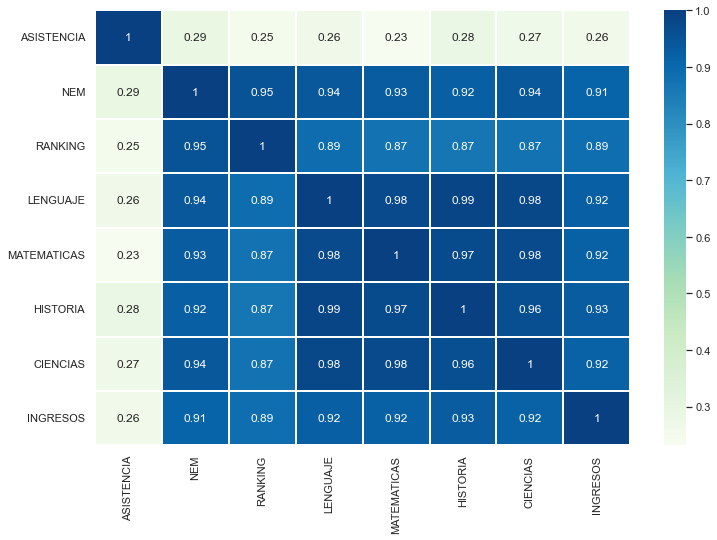

In [69]:
data = gdf_todo.drop('COMUNA', axis=1)
fig,  ax = plt.subplots(1, 1, figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, ax=ax,cmap='GnBu')

####  Al observar el mapa de calor respecto a la variable de los ingresos nos damos cuenta que sí podríamos encontrar una correlación respecto al resto de las variables, entonces, procedemos a generar el modelo de regresión.

In [58]:
x = gdf_todo.drop(['COMUNA', 'INGRESOS'], axis = 1).values
y = gdf_todo['INGRESOS']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [59]:
#Estandarizacion de datos
train_mean = x_train.mean()
train_std = x_train.std()

names = gdf_todo.columns.drop(['COMUNA','INGRESOS'])
scaler = StandardScaler()
scaled_train = scaler.fit_transform(x_train)
x_test_standard = (x_test - train_mean) / train_std #scaler.fit_transform(x_test)
x_train_standard = pd.DataFrame(scaled_train, columns=names)

x_train_standard.head()

,ASISTENCIA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS
0,0.756229,-0.879425,-0.878260,-0.063674,-0.262992,-0.271886,-0.188987
1,0.616243,0.582906,0.777397,0.929337,0.561998,0.886982,0.826614
2,-0.045791,-0.965643,-0.907220,-0.948001,-0.654844,-0.707826,-0.985688
3,-0.175421,-0.852585,-0.838661,-0.674622,-0.643977,-0.746391,-0.702600
4,-1.932972,-0.566955,-0.576174,-0.509578,-0.524901,-0.583441,-0.552066


In [60]:
#Testear el machine learning

ml = LinearRegression()
ml.fit(x_train, y_train)

#Predecir resultado
y_pred = ml.predict(x_test)

In [61]:
def regression_results(y_true, y_pred, p):
    explained_variance=explained_variance_score(y_true, y_pred)
    mae=mean_absolute_error(y_true, y_pred) 
    mse=mean_squared_error(y_true, y_pred) 
    r2=r2_score(y_true, y_pred)

    n = y_true.shape[0]
    adjr2 = 1-(1-r2) * (n-1)/(n-p)

    print('Explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('adjr2: ', round(adjr2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
#Metricas lineales.
true = y_test.values
pred = y_pred
p = x_test.shape[1]
regression_results(true, pred, p=p)

Explained_variance:  0.7798
r2:  0.7743
adjr2:  0.5486
MAE:  0.3554
MSE:  0.1769
RMSE:  0.4206


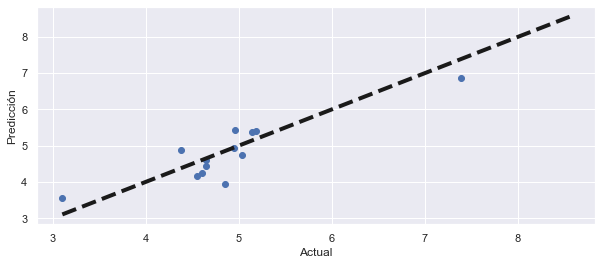

In [63]:
#REGRESION LINEAL plot
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(y_test, pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicción')
ax.annotate("r-squared = {:.3f}".format(r2_score(y_test, pred)), (0, 1))
plt.show()

In [64]:
# Regresión ridge
ridge = Ridge(alpha=600)
ridge.fit(x_train, y_train)

Ridge(alpha=600)

In [65]:
# predicción y calculo de los resultados
y_pred = ridge.predict(x_test)
pred = y_pred
regression_results(true, pred, p=p)

Explained_variance:  0.7658
r2:  0.7615
adjr2:  0.523
MAE:  0.3417
MSE:  0.1869
RMSE:  0.4324


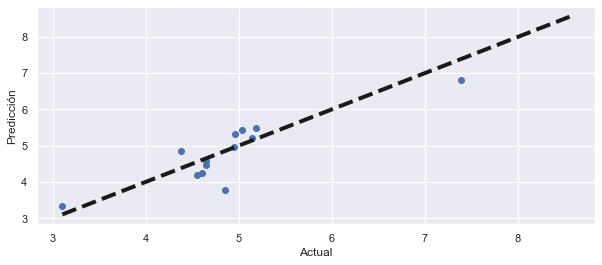

In [67]:
# Ridge plot
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(y_test, pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicción')
ax.annotate("r-squared = {:.3f}".format(r2_score(y_test, pred)), (0, 1))
plt.show()

#### Con ambos modelos obtenemos resultados similares, sin embargo dado que el r2 del primer modelo es ligeramente mas alto, la regresión lineal es levemente mayor y tanto los valores mae, mse y rmse  son menores en comparación con el modelo de Ridge, por lo tanto concluimos que este tiene un mejor desempeño.

### **Conclusiones del proyecto**

A modo de conclusión se plantea responder las preguntas de investigación:

**¿Influye el factor económico en el acceso a la educación superior?**

Sí, puesto que mediante distintos recursos queda demostrado que sí influye el rendimiento dependiente al nivel de ingresos de las personas, esto implica necesariamente que a mayor nivel económico, mayor facilidad de poder ingresar a una institución de educación superior universitaria (No así a centros de formación técnicas).

**¿Influye el rendimiento académico en el acceso a la educación superior?**

Sí, mediante el primer dataframe analizado, queda demostrado que a mayor nivel de rendimiento académico, las personas tienden a elegir instituciones con mayores filtros (universitarias).


**¿Cuál de las anteriores variables puede tener un mayor impacto?**

Tiene mayor impacto el ingreso promedio a nivel comunal. Es posible apreciar mediante el Geodataframe empleado que aquellas comunas con mayores ingresos son aquellas que aglomeran los mayores puntajes a nivel comunal del país.

**¿Es posible encontrar una correlación entre el rendimiento académico promedio por comuna y el nivel de ingreso medio por comuna?**

Sí, mediante el uso de una regresión lineal con la libreria Sklearn, es posible verificar que existe una correlación entre el nivel de ingresos de la comuna y el rendimiento academico de esta. Es decir, mientras mas alto el rendimiento académico, se espera un mayor nivel de ingresos promedios.

**¿Se puede predecir el desempeño del próximo año a partir de lo observado?**

El modelo final de regresión utilizado puede ser utilizado como herramienta para generar ciertas conclusiones y expectativas sobre la tendencia que se espera tener para el proximo año (Que la tendencia se mantenga a menos de que haya algún factor externo de tipo económico).

Ahora bien, como indican las métricas elaboradas en el trabajo, estas no son precisas, por lo que si se quisiera obtener mejores conclusiones lo ideal sería entrenar un nuevo modelo en el cual se tengan presente mas columnas de las cuáles hayan indicios estadísticos de que influyen en el rendimiento académico.

Una forma que se recomendaría para mejorar dichas métricas y el modelo, sería el empleo de variables sociales tales como la situación laboral de los padres, la situación conyugal, entre otras. 